In [33]:
pip install kaggle

In [34]:
!pip install -q kaggle

In [35]:
!mkdir ~/.kaggle


In [36]:
!cp /content/kaggle.json

cp: missing destination file operand after '/content/kaggle.json'
Try 'cp --help' for more information.


In [37]:
!kaggle datasets download -d

usage: kaggle datasets download [-h] [-f FILE_NAME] [-p PATH] [-w] [--unzip] [-o] [-q] [dataset]
kaggle datasets download: error: argument -d/--dataset: expected one argument


In [39]:
!kaggle datasets download -d htagholdings/property-sales

Dataset URL: https://www.kaggle.com/datasets/htagholdings/property-sales
License(s): copyright-authors
  0% 0.00/162k [00:00<?, ?B/s]
100% 162k/162k [00:00<00:00, 95.0MB/s]


In [40]:
!unzip /content/property-sales.zip

Archive:  /content/property-sales.zip
  inflating: ma_lga_12345.csv        
  inflating: raw_sales.csv           


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [46]:
data = pd.read_csv('/content/raw_sales.csv', parse_dates=['datesold'], index_col='datesold') # The date column in raw_sales.csv is called 'datesold'

In [49]:
# Since 'datesold' was set as the index in the previous step,
# you can rename it to 'date' if needed.
data.index.rename('date', inplace=True)

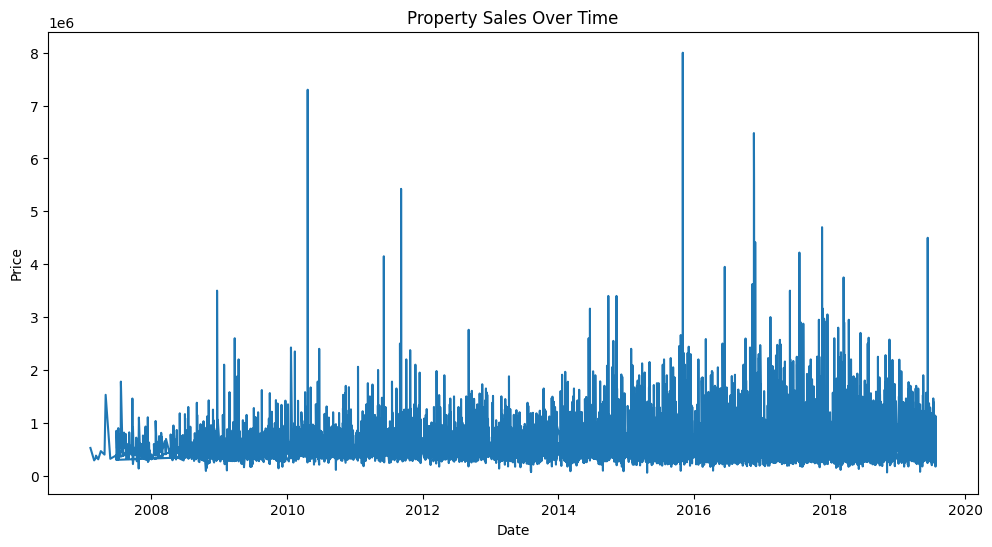

In [50]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['price'])
plt.title('Property Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [51]:
print(data.isnull().sum())

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


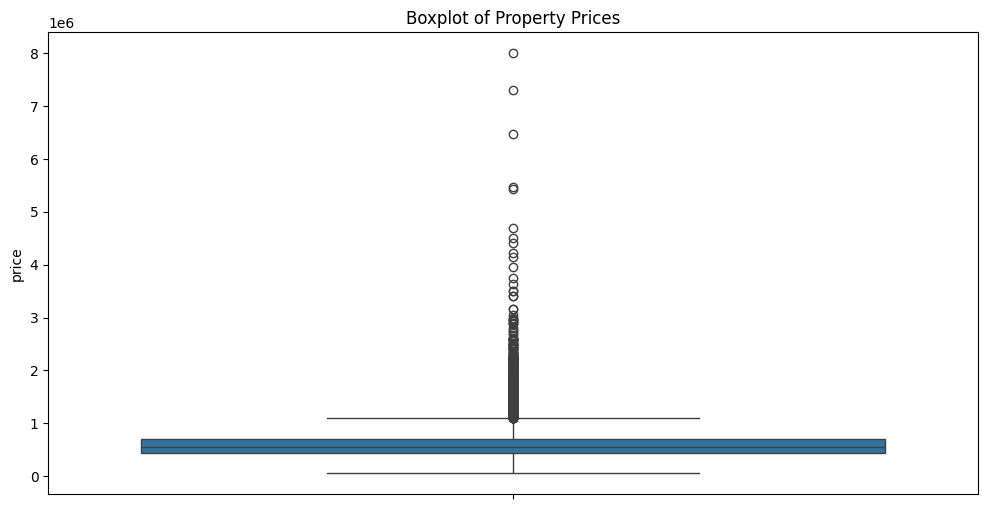

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['price'])
plt.title('Boxplot of Property Prices')
plt.show()

In [53]:
 #Statistical tests
mean = data['price'].mean()
std_dev = data['price'].std()
variance = data['price'].var()

print(f'Mean: {mean}, Standard Deviation: {std_dev}, Variance: {variance}')

Mean: 609736.262204192, Standard Deviation: 281707.9053741625, Variance: 79359343950.2981


In [54]:
# ADF Test for stationarity
adf_result = adfuller(data['price'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -10.435026739473496
p-value: 1.5745251680570247e-18


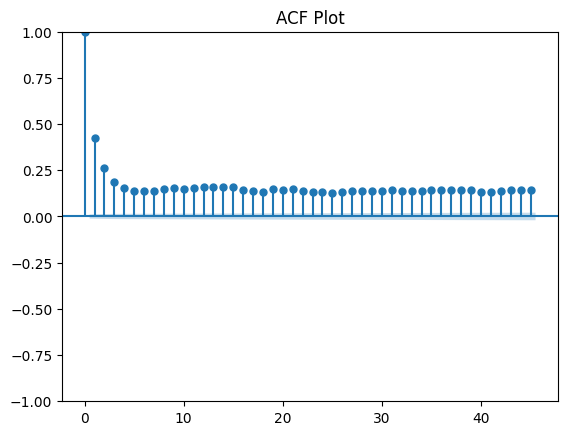

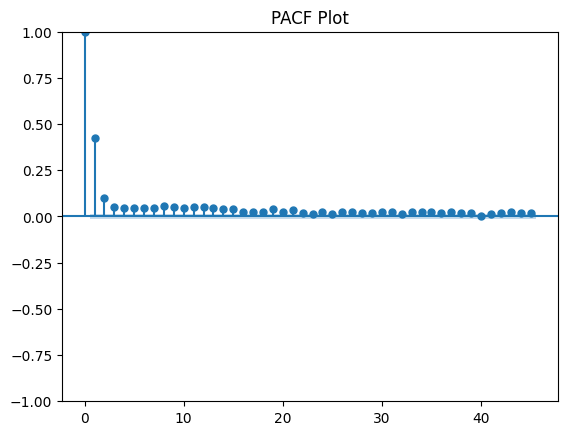

In [55]:
# ACF and PACF plots
plot_acf(data['price'])
plt.title('ACF Plot')
plt.show()

plot_pacf(data['price'])
plt.title('PACF Plot')
plt.show()

In [56]:
# Model Selection
# Based on ACF and PACF, select ARIMA parameters (p, d, q)
p = 1  # AR term
d = 1  # Differencing
q = 1  # MA term

In [57]:
# Fit the ARIMA model
model = ARIMA(data['price'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [58]:
# Model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                29580
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -409437.181
Date:                Fri, 04 Oct 2024   AIC                         818880.362
Time:                        08:35:10   BIC                         818905.247
Sample:                             0   HQIC                        818888.352
                              - 29580                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3221      0.002    154.618      0.000       0.318       0.326
ma.L1         -0.9949      0.001  -1419.941      0.000      -0.996      -0.994
sigma2      7.269e+10   5.41e-15   1.34e+25      0.0

In [59]:
# Forecasting
forecast = model_fit.forecast(steps=10)
print(f'Forecasted Prices: {forecast}')

Forecasted Prices: 29580    533317.969135
29581    455473.208681
29582    430399.740420
29583    422323.682289
29584    419722.418106
29585    418884.561909
29586    418614.691970
29587    418527.768004
29588    418499.770161
29589    418490.752175
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
